In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('../data/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


- species (종): 펭귄의 종을 나타내는 값으로, 데이터셋에 포함된 펭귄의 종을 구분합니다. 예를 들어, 'Adelie', 'Chinstrap', 'Gentoo' 등이 될 수 있습니다.
- island (섬): 펭귄이 서식하는 섬을 나타내는 값입니다. 예를 들어, 'Torgersen', 'Biscoe', 'Dream' 등이 될 수 있습니다.
- culmen_length_mm (부리 길이): 펭귄의 부리 길이를 밀리미터 단위로 측정한 값입니다.
- culmen_depth_mm (부리 깊이): 펭귄의 부리 깊이를 밀리미터 단위로 측정한 값입니다.
- flipper_length_mm (날개 길이): 펭귄의 날개 길이를 밀리미터 단위로 측정한 값입니다.
- body_mass_g (체중): 펭귄의 체중을 그램 단위로 측정한 값입니다.
- sex (성별): 펭귄의 성별을 나타내는 값으로, 'Male' (수컷), 'Female' (암컷), 또는 'NA' (데이터 부재) 등이 될 수 있습니다.






In [117]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<AxesSubplot: ylabel='body_mass_g'>

<Figure size 720x432 with 0 Axes>

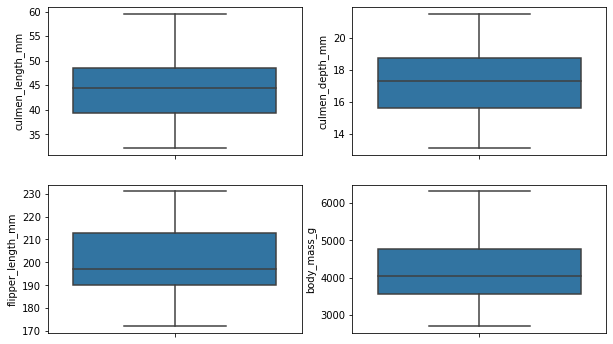

In [118]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

sns.boxplot(y=df['culmen_length_mm'], ax=ax[0, 0])
sns.boxplot(y=df['culmen_depth_mm'], ax=ax[0, 1])
sns.boxplot(y=df['flipper_length_mm'], ax=ax[1, 0])
sns.boxplot(y=df['body_mass_g'], ax=ax[1, 1])


In [119]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [120]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())
    print()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [121]:
df = df.dropna() # na값 제거
df = df[df['sex'] != '.'] # .값 제거

In [122]:
## Train Test Split

from sklearn.model_selection import train_test_split

X = df.drop(columns='species')
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

(266, 6) (67, 6) (266,) (67,)
species
Adelie       115
Gentoo        96
Chinstrap     55
Name: count, dtype: int64
species
Adelie       31
Gentoo       23
Chinstrap    13
Name: count, dtype: int64


## 전처리

In [123]:
# island one-hot encoding 
X_train = pd.get_dummies(X_train, columns=['island'], drop_first=True, )
X_test = pd.get_dummies(X_test, columns=['island'], drop_first=True)

X_train[['island_Dream', 'island_Torgersen']] = X_train[['island_Dream', 'island_Torgersen']].astype('int')
X_test[['island_Dream', 'island_Torgersen']] = X_test[['island_Dream', 'island_Torgersen']].astype('int')

# sex label encoding
X_train['sex'] = X_train['sex'].apply(lambda x: 0 if x == 'FEMALE' else 1)
X_test['sex'] = X_test['sex'].apply(lambda x: 0 if x == 'FEMALE' else 1)



In [124]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
230,40.9,13.7,214.0,4650.0,0,0,0
84,37.3,17.8,191.0,3350.0,0,1,0
303,50.0,15.9,224.0,5350.0,1,0,0
22,35.9,19.2,189.0,3800.0,0,0,0
29,40.5,18.9,180.0,3950.0,1,0,0
...,...,...,...,...,...,...,...
194,50.9,19.1,196.0,3550.0,1,1,0
77,37.2,19.4,184.0,3900.0,1,0,1
112,39.7,17.7,193.0,3200.0,0,0,0
277,45.5,15.0,220.0,5000.0,1,0,0


## 파라미터 튜닝

Scaler도 같이 튜닝

In [125]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

best_accuracy = 0
best_params = {}


scalers = [StandardScaler(), MinMaxScaler()]
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'max_iter': [100, 200, 500, 1000, 2000, 5000]}

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # GridSearchCV
    svc = SVC(random_state=42)
    clf = GridSearchCV(svc, params, cv=5, n_jobs=-1)
    clf.fit(X_train_scaled, y_train)

    pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = clf.best_params_
        print('Scaler:', scaler.__class__.__name__)
        print('Best params:', clf.best_params_)
        print('Accuracy:', accuracy_score(y_test, pred))
        print()


print('Best Accuracy:', best_accuracy)



/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with S

Scaler: StandardScaler
Best params: {'C': 10, 'kernel': 'sigmoid', 'max_iter': 100}
Accuracy: 1.0



/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with S

Best Accuracy: 1.0


/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with S

## Best Model

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(**best_params)
svc.fit(X_train_scaled, y_train)

pred = svc.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, pred))
print()

Accuracy: 1.0

